# Linear Regression Demo: Visual Intuition and Model Behavior

This notebook explores key concepts in linear regression through visualizations and interactive examples. Focus on understanding the intuition behind the mathematics rather than implementation details.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Section 1: Understanding the Cost Function Landscape

Before diving into gradient descent, let's visualize what we're actually optimizing. The cost function creates a landscape that our algorithm must navigate.

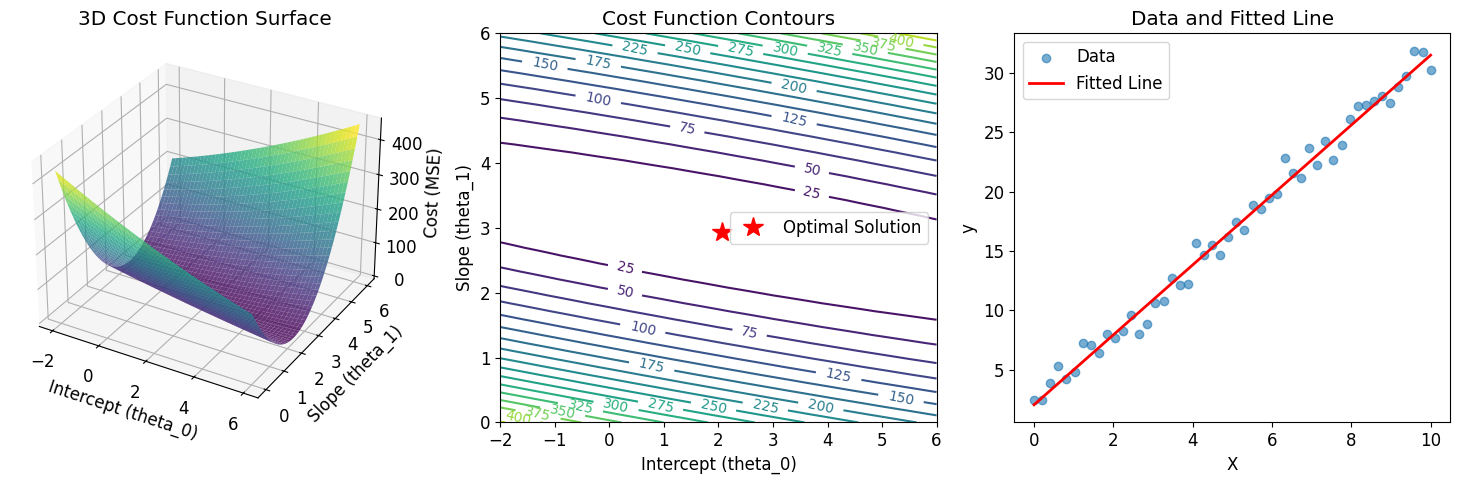

Optimal parameters: intercept = 2.06, slope = 2.94
Minimum cost: 0.83


In [6]:
# Generate simple dataset
np.random.seed(42)
X_simple = np.linspace(0, 10, 50)
y_simple = 2 + 3 * X_simple + np.random.normal(0, 1, 50)

# Add intercept term
X_matrix = np.column_stack([np.ones(len(X_simple)), X_simple])

def compute_mse_cost(theta, X, y):
    """Compute MSE cost for given parameters"""
    predictions = X @ theta
    return np.mean((predictions - y) ** 2)

# Create parameter grid for visualization
theta0_range = np.linspace(-2, 6, 50)  # intercept
theta1_range = np.linspace(0, 6, 50)   # slope
THETA0, THETA1 = np.meshgrid(theta0_range, theta1_range)

# Compute cost for each parameter combination
costs = np.zeros_like(THETA0)
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        theta = np.array([THETA0[j, i], THETA1[j, i]])
        costs[j, i] = compute_mse_cost(theta, X_matrix, y_simple)

# Create 3D surface plot
fig = plt.figure(figsize=(15, 5))

# 3D surface
ax1 = fig.add_subplot(131, projection='3d')
surface = ax1.plot_surface(THETA0, THETA1, costs, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Intercept (theta_0)')
ax1.set_ylabel('Slope (theta_1)')
ax1.set_zlabel('Cost (MSE)')
ax1.set_title('3D Cost Function Surface')

# 2D contour plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(THETA0, THETA1, costs, levels=20)
ax2.clabel(contour, inline=True, fontsize=10)
ax2.set_xlabel('Intercept (theta_0)')
ax2.set_ylabel('Slope (theta_1)')
ax2.set_title('Cost Function Contours')

# Mark the optimal solution
theta_optimal = np.linalg.solve(X_matrix.T @ X_matrix, X_matrix.T @ y_simple)
ax2.plot(theta_optimal[0], theta_optimal[1], 'r*', markersize=15, label='Optimal Solution')
ax2.legend()

# Show the data and fitted line
ax3 = fig.add_subplot(133)
ax3.scatter(X_simple, y_simple, alpha=0.6, label='Data')
y_pred = X_matrix @ theta_optimal
ax3.plot(X_simple, y_pred, 'r-', linewidth=2, label='Fitted Line')
ax3.set_xlabel('X')
ax3.set_ylabel('y')
ax3.set_title('Data and Fitted Line')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"Optimal parameters: intercept = {theta_optimal[0]:.2f}, slope = {theta_optimal[1]:.2f}")
print(f"Minimum cost: {compute_mse_cost(theta_optimal, X_matrix, y_simple):.2f}")

**Key Takeaway:** The cost function forms a bowl-shaped surface with a unique minimum. This convex shape guarantees that gradient descent will find the global optimum.

## Section 2: The Impact of Outliers

Linear regression is sensitive to outliers because it minimizes squared errors. Let's see how a single outlier can dramatically change our model.

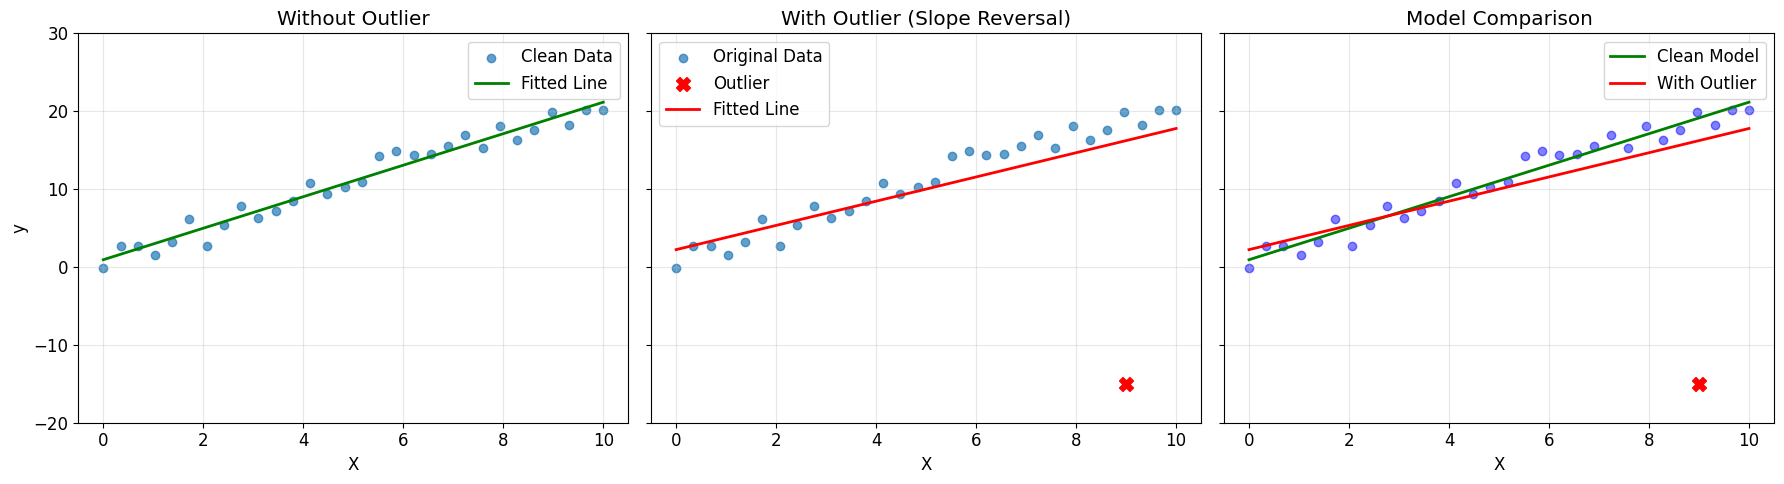

Model Parameters:
Clean data    - Intercept: 0.93, Slope: 2.02
With outlier  - Intercept: 2.23, Slope: 1.56

Change in slope: -23.1%
Slope direction change: No


In [18]:
# Create dataset with and without outlier
np.random.seed(123)
X_clean = np.linspace(0, 10, 30)
y_clean = 1 + 2 * X_clean + np.random.normal(0, 1, 30)

# Add an outlier
X_outlier = np.append(X_clean, 2)
y_outlier = np.append(y_clean, 100)  # This point is way off the trend

# Fit models
model_clean = LinearRegression().fit(X_clean.reshape(-1, 1), y_clean)
model_outlier = LinearRegression().fit(X_outlier.reshape(-1, 1), y_outlier)

# Predictions for plotting
X_plot = np.linspace(0, 10, 100)
y_pred_clean = model_clean.predict(X_plot.reshape(-1, 1))
y_pred_outlier = model_outlier.predict(X_plot.reshape(-1, 1))

# Create figure with shared y-axis
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Factor out the outlier point instead of hardcoding
outlier1 = (9, -15)  # (x, y) for outlier that will change slope to negative

# Add outlier to the data
X_outlier = np.append(X_clean, outlier1[0])
y_outlier = np.append(y_clean, outlier1[1])

# Fit models
model_outlier = LinearRegression().fit(X_outlier.reshape(-1, 1), y_outlier)

# Calculate y-limits that make the plot clear
ylim_main = (-20, 30)

# Clean data
axes[0].scatter(X_clean, y_clean, alpha=0.7, label='Clean Data')
axes[0].plot(X_plot, y_pred_clean, 'g-', linewidth=2, label='Fitted Line')
axes[0].set_title('Without Outlier')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(ylim_main)

# Data with outlier
axes[1].scatter(X_clean, y_clean, alpha=0.7, label='Original Data')
axes[1].scatter(outlier1[0], outlier1[1], color='red', s=100, label='Outlier', marker='X')
axes[1].plot(X_plot, model_outlier.predict(X_plot.reshape(-1, 1)), 'r-', linewidth=2, label='Fitted Line')
axes[1].set_title('With Outlier (Slope Reversal)')
axes[1].set_xlabel('X')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(ylim_main)

# Comparison
axes[2].plot(X_plot, y_pred_clean, 'g-', linewidth=2, label='Clean Model')
axes[2].plot(X_plot, model_outlier.predict(X_plot.reshape(-1, 1)), 'r-', linewidth=2, label='With Outlier')
axes[2].scatter(X_clean, y_clean, alpha=0.5, color='blue')
axes[2].scatter(outlier1[0], outlier1[1], color='red', s=100, marker='X')
axes[2].set_title('Model Comparison')
axes[2].set_xlabel('X')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_ylim(ylim_main)

plt.tight_layout()
plt.show()

# Compare coefficients
print("Model Parameters:")
print(f"Clean data    - Intercept: {model_clean.intercept_:.2f}, Slope: {model_clean.coef_[0]:.2f}")
print(f"With outlier  - Intercept: {model_outlier.intercept_:.2f}, Slope: {model_outlier.coef_[0]:.2f}")
print(f"\nChange in slope: {((model_outlier.coef_[0] - model_clean.coef_[0]) / model_clean.coef_[0] * 100):.1f}%")
print(f"Slope direction change: {'Yes (positive to negative)' if model_clean.coef_[0] > 0 and model_outlier.coef_[0] < 0 else 'No'}")


**Key Takeaway:** A single outlier can dramatically change the fitted line because linear regression minimizes squared errors, giving disproportionate weight to large deviations.

## Section 3: Residual Analysis and Model Assumptions

Residuals (prediction errors) tell us whether our linear model is appropriate. Let's examine what good and bad residual patterns look like.

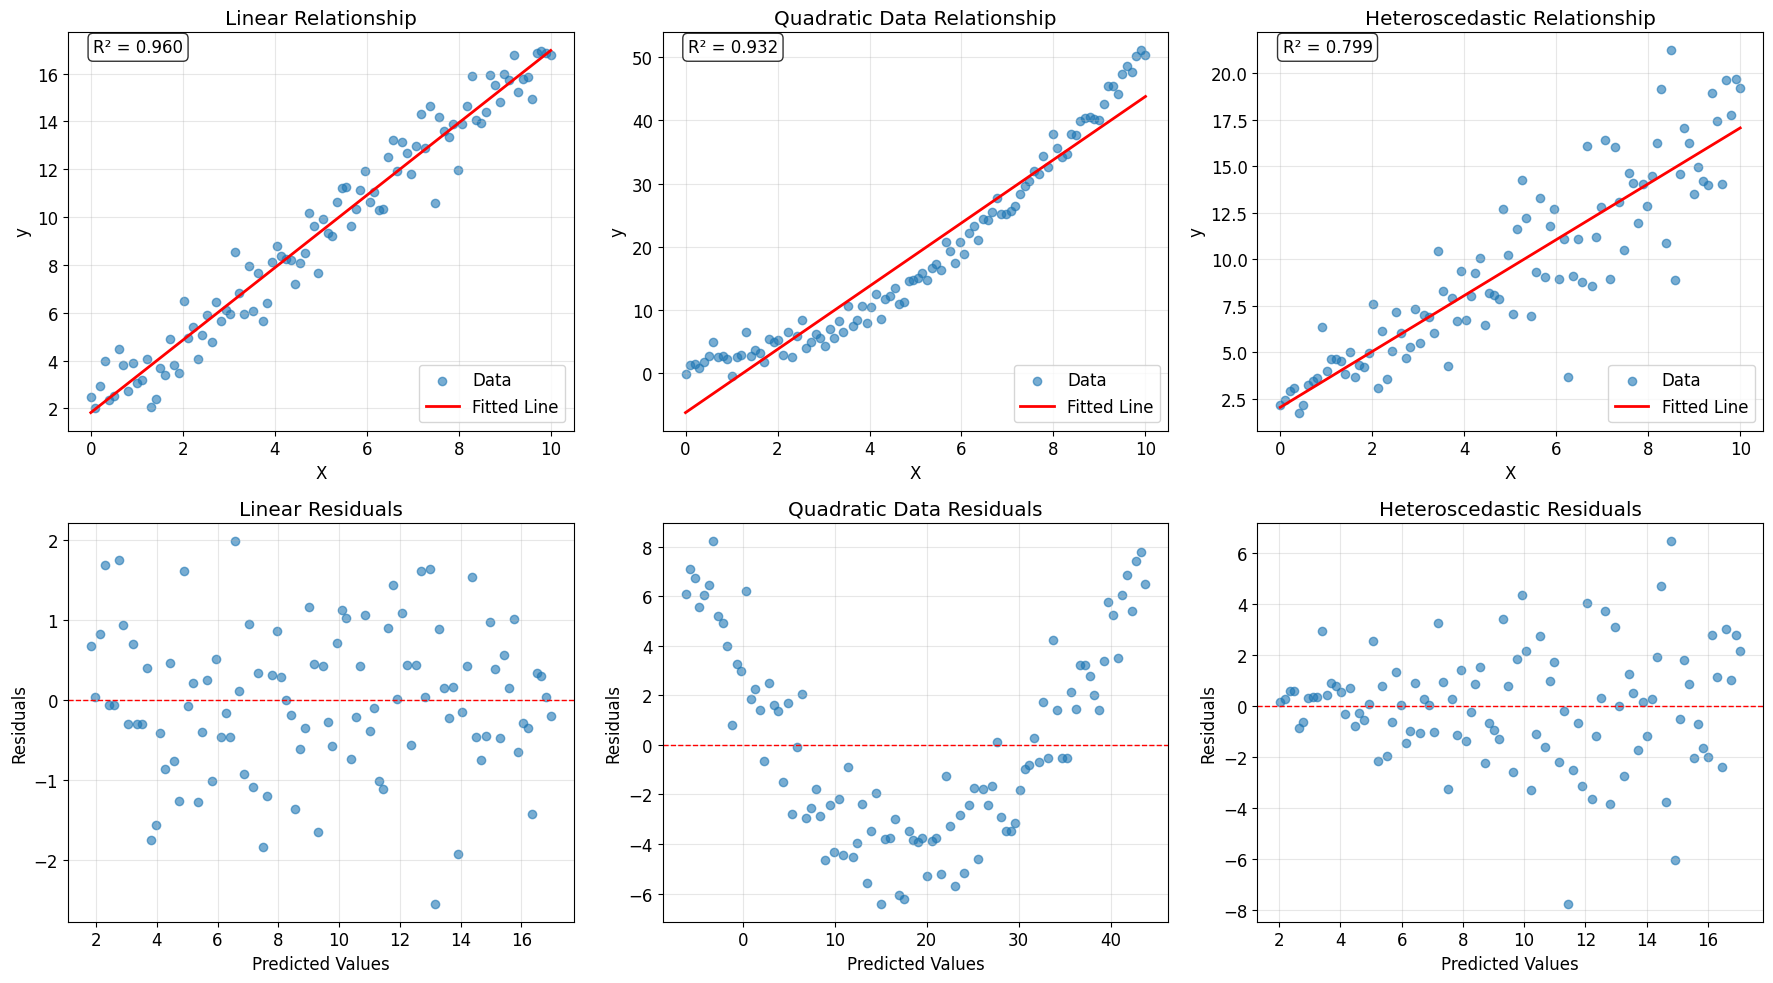

Residual Pattern Interpretation:
• Linear: Random scatter around zero (GOOD)
• Quadratic: Curved pattern (BAD - suggests nonlinear relationship)
• Heteroscedastic: Fan shape (BAD - violates constant variance assumption)


In [21]:
# Create different types of relationships
np.random.seed(42)
X_resid = np.linspace(0, 10, 100)

# Linear relationship (good for linear regression)
y_linear = 2 + 1.5 * X_resid + np.random.normal(0, 1, 100)

# Quadratic relationship (bad for linear regression)
y_quadratic = 2 + 0.5 * X_resid**2 + np.random.normal(0, 1.5, 100)

# Heteroscedastic (changing variance)
noise_std = 0.5 + 0.3 * X_resid  # Variance increases with X
y_hetero = 2 + 1.5 * X_resid + np.random.normal(0, noise_std, 100)

# Fit linear models to all
models = {
    'Linear': LinearRegression().fit(X_resid.reshape(-1, 1), y_linear),
    'Quadratic Data': LinearRegression().fit(X_resid.reshape(-1, 1), y_quadratic),
    'Heteroscedastic': LinearRegression().fit(X_resid.reshape(-1, 1), y_hetero)
}

datasets = {
    'Linear': y_linear,
    'Quadratic Data': y_quadratic,
    'Heteroscedastic': y_hetero
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, (name, model) in enumerate(models.items()):
    y_data = datasets[name]
    y_pred = model.predict(X_resid.reshape(-1, 1))
    residuals = y_data - y_pred

    # Top row: Data and fitted line
    axes[0, i].scatter(X_resid, y_data, alpha=0.6, label='Data')
    axes[0, i].plot(X_resid, y_pred, 'r-', linewidth=2, label='Fitted Line')
    axes[0, i].set_title(f'{name} Relationship')
    axes[0, i].set_xlabel('X')
    axes[0, i].set_ylabel('y')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)

    # Bottom row: Residual plots
    axes[1, i].scatter(y_pred, residuals, alpha=0.6)
    axes[1, i].axhline(y=0, color='r', linestyle='--', linewidth=1)
    axes[1, i].set_title(f'{name} Residuals')
    axes[1, i].set_xlabel('Predicted Values')
    axes[1, i].set_ylabel('Residuals')
    axes[1, i].grid(True, alpha=0.3)

    # Add R-squared
    r2 = model.score(X_resid.reshape(-1, 1), y_data)
    axes[0, i].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[0, i].transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("Residual Pattern Interpretation:")
print("• Linear: Random scatter around zero (GOOD)")
print("• Quadratic: Curved pattern (BAD - suggests nonlinear relationship)")
print("• Heteroscedastic: Fan shape (BAD - violates constant variance assumption)")

**Key Takeaway:** Good residual plots show random scatter around zero. Patterns in residuals indicate that linear regression assumptions are violated and suggest model improvements.

## Section 4: Feature Scaling and Its Impact

When features have different scales, gradient descent can behave poorly. Let's see why standardization helps.

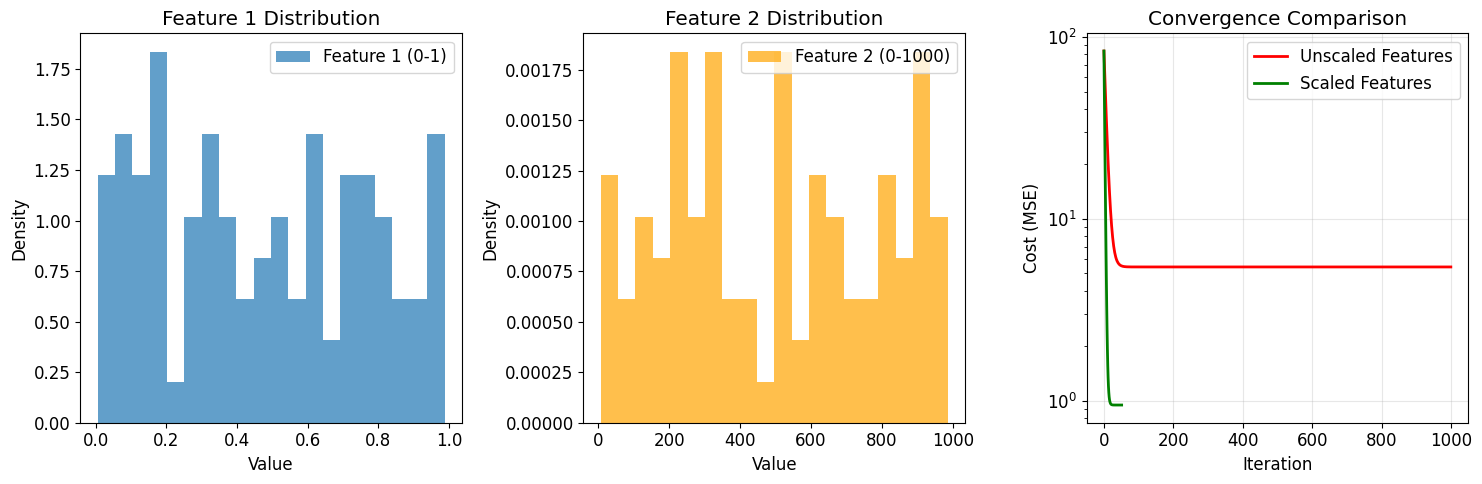

Unscaled: 1000 iterations (did not converge), final cost: 5.429385
Scaled:   52 iterations, final cost: 0.945672

Scaling enabled convergence while unscaled version did not converge

True coefficients: [intercept=1, X1=5, X2=0.01]
Unscaled coefficients: [0.00018544 0.00017138 0.01531505]
Scaled coefficients (transformed back): [0.91063891 4.65818398 0.01071918]


In [ ]:
# Create dataset with different feature scales
np.random.seed(42)
n_samples = 100

# Feature 1: Small scale (0-1)
X1 = np.random.uniform(0, 1, n_samples)
# Feature 2: Large scale (0-1000)
X2 = np.random.uniform(0, 1000, n_samples)

# True relationship: y = 1 + 5*X1 + 0.01*X2 + noise
y_multi = 1 + 5 * X1 + 0.01 * X2 + np.random.normal(0, 1, n_samples)

# Create feature matrices (with intercept)
X_unscaled = np.column_stack([np.ones(n_samples), X1, X2])

# Standardize features (not intercept)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(np.column_stack([X1, X2]))
X_scaled = np.column_stack([np.ones(n_samples), X_features_scaled])

# Define gradient descent function with early stopping for numerical stability
def gradient_descent_viz(X, y, learning_rate=0.01, max_iter=1000):
    theta = np.zeros(X.shape[1])
    costs = []
    thetas = [theta.copy()]

    for i in range(max_iter):
        predictions = X @ theta
        cost = np.mean((predictions - y) ** 2)
        costs.append(cost)

        gradients = (2 / len(y)) * X.T @ (predictions - y)
        theta = theta - learning_rate * gradients
        thetas.append(theta.copy())

        # Stop if we get NaN (divergence)
        if np.isnan(cost) or np.any(np.isnan(theta)):
            print(f"Warning: Gradient descent diverged at iteration {i}")
            return thetas[-2], costs[:-1], thetas[:-1]  # Return last valid values

        # Early stopping if converged
        if i > 0 and abs(costs[-2] - costs[-1]) < 1e-8:
            break

    return theta, costs, thetas

# Run gradient descent on both versions
# Use much smaller learning rate for unscaled to avoid divergence
theta_unscaled, costs_unscaled, _ = gradient_descent_viz(X_unscaled, y_multi, learning_rate=1e-7)
theta_scaled, costs_scaled, _ = gradient_descent_viz(X_scaled, y_multi, learning_rate=0.1)

# Plot convergence comparison
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Feature distributions
ax1.hist(X1, bins=20, alpha=0.7, label='Feature 1 (0-1)', density=True)
ax1.set_title('Feature 1 Distribution')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.legend()

ax2.hist(X2, bins=20, alpha=0.7, label='Feature 2 (0-1000)', color='orange', density=True)
ax2.set_title('Feature 2 Distribution')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

# Plot convergence comparison for both unscaled and scaled features
iterations_unscaled = range(len(costs_unscaled))
iterations_scaled = range(len(costs_scaled))

# Combined convergence plot
ax3.plot(iterations_unscaled, costs_unscaled, 'r-', linewidth=2, label='Unscaled Features')
ax3.plot(iterations_scaled, costs_scaled, 'g-', linewidth=2, label='Scaled Features')
ax3.set_title('Convergence Comparison')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Cost (MSE)')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

# If unscaled doesn't converge in max_iter, note that
if len(iterations_unscaled) >= 1000:
    print(f"Unscaled: {len(costs_unscaled)} iterations (did not converge), final cost: {costs_unscaled[-1]:.6f}")
else:
    print(f"Unscaled: {len(costs_unscaled)} iterations, final cost: {costs_unscaled[-1]:.6f}")

print(f"Scaled:   {len(costs_scaled)} iterations, final cost: {costs_scaled[-1]:.6f}")

if len(costs_scaled) > 0 and len(costs_unscaled) > 0:
    # Check that both actually converged
    if len(iterations_unscaled) < 1000:
        print(f"\nSpeedup factor: {len(costs_unscaled) / len(costs_scaled):.1f}x faster with scaling")
    else:
        print("\nScaling enabled convergence while unscaled version did not converge")

# Show estimated coefficients
print("\nTrue coefficients: [intercept=1, X1=5, X2=0.01]")
if np.any(np.isnan(theta_unscaled)):
    print("Unscaled coefficients: Diverged (NaN)")
else:
    print(f"Unscaled coefficients: {theta_unscaled}")

# For scaled features, convert back to original scale for comparison
if not np.any(np.isnan(theta_scaled)):
    # First coefficient is intercept
    intercept = theta_scaled[0]
    # Other coefficients need to be divided by std and multiplied by original coefficient
    feature_means = scaler.mean_
    feature_stds = scaler.scale_

    original_scale_coefs = np.zeros_like(theta_scaled)
    original_scale_coefs[0] = intercept - (theta_scaled[1] * feature_means[0] / feature_stds[0]) - (theta_scaled[2] * feature_means[1] / feature_stds[1])
    original_scale_coefs[1] = theta_scaled[1] / feature_stds[0]
    original_scale_coefs[2] = theta_scaled[2] / feature_stds[1]

    print(f"Scaled coefficients (transformed back): {original_scale_coefs}")

**Key Takeaway:** Feature scaling dramatically improves gradient descent convergence when features have different scales. Without scaling, the algorithm takes much longer to converge.

## Section 5: Polynomial Features and the Bias-Variance Tradeoff

Linear regression can model nonlinear relationships using polynomial features, but this introduces the risk of overfitting.

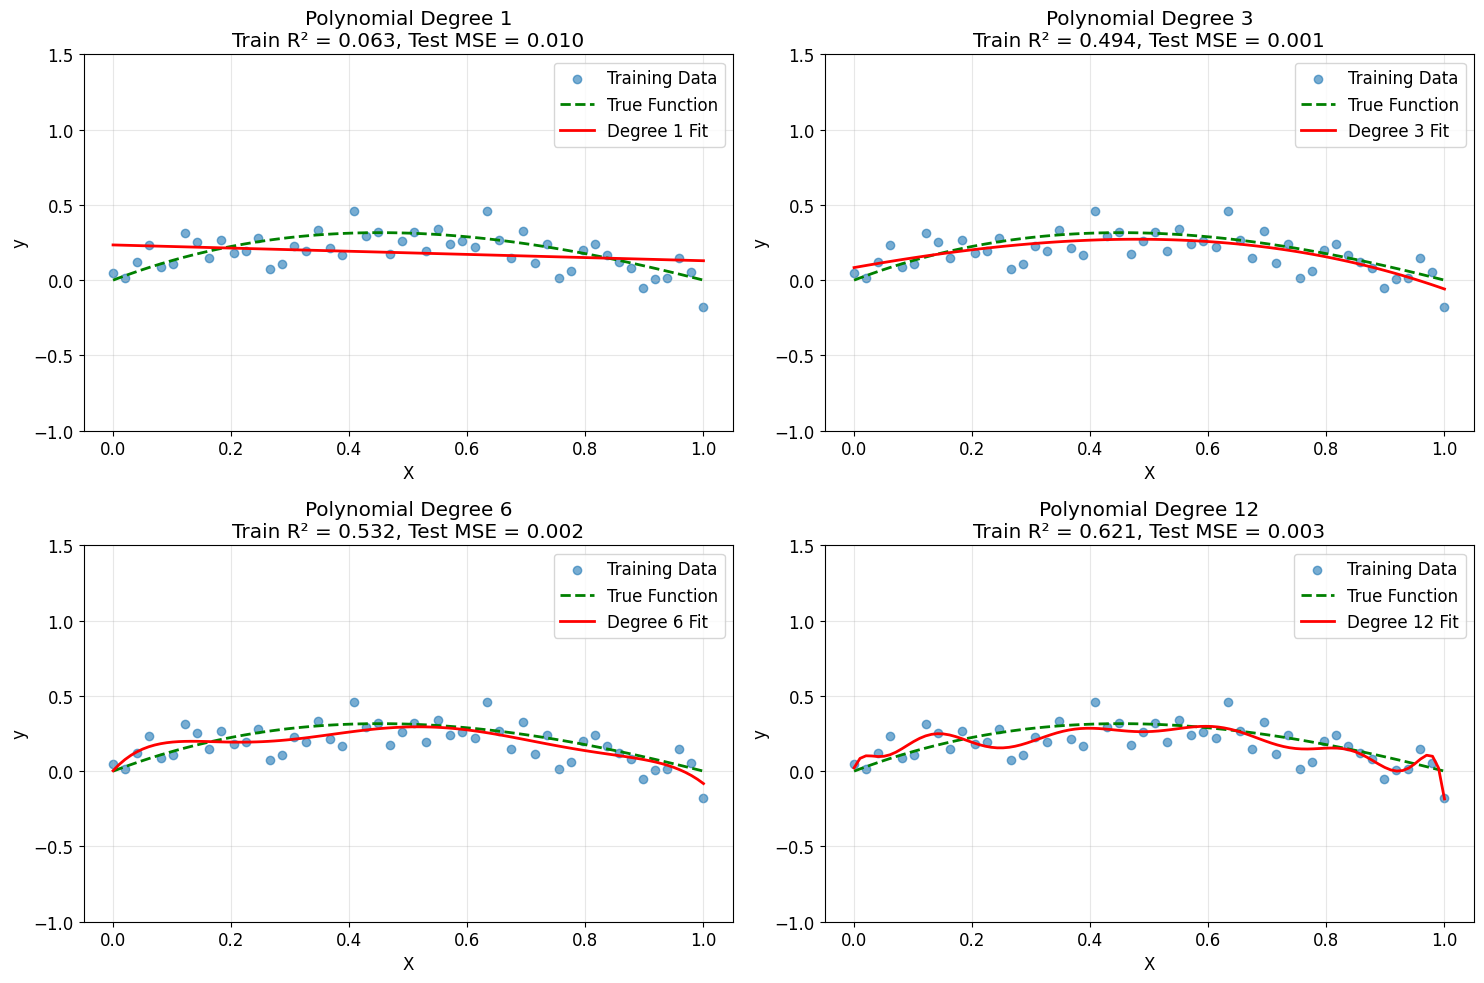

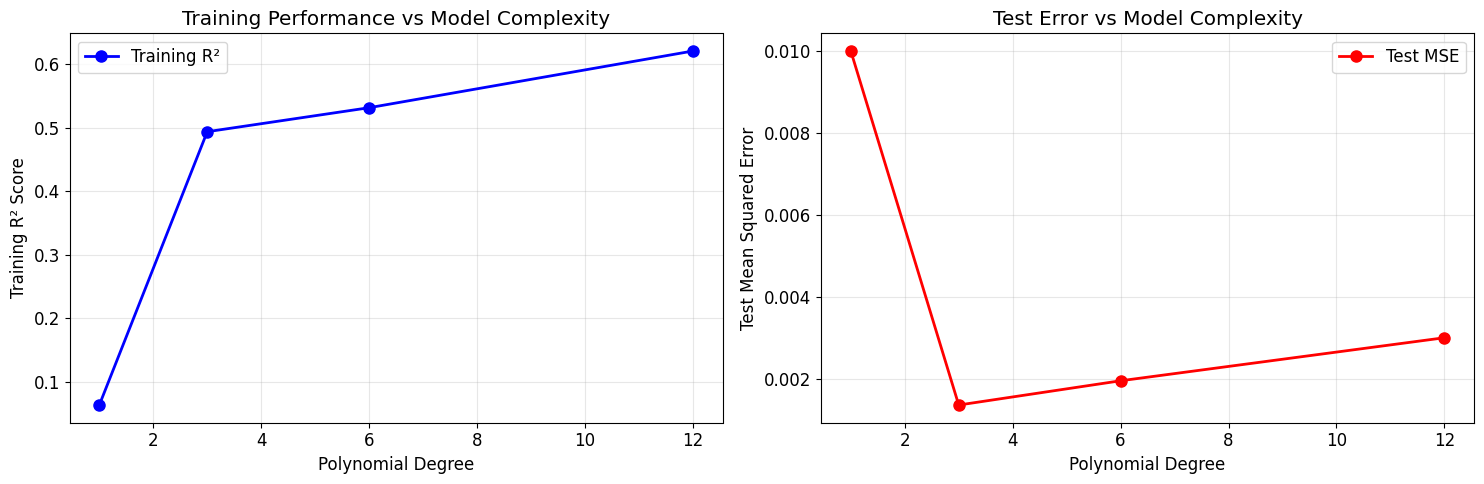

Bias-Variance Tradeoff Observations:
• Low degree: High bias (underfitting), low variance
• High degree: Low bias, high variance (overfitting)
• Optimal degree appears to be around 3 for this dataset


In [28]:
# Generate nonlinear dataset
np.random.seed(42)
X_poly = np.linspace(0, 1, 50)
y_true_func = lambda x: 1.5 * x - 2 * x**2 + 0.5 * x**3
y_poly = y_true_func(X_poly) + np.random.normal(0, 0.1, 50)

# Test set for evaluation
X_test = np.linspace(0, 1, 100)
y_test_true = y_true_func(X_test)

# Fit polynomial models of different degrees
degrees = [1, 3, 6, 12]
models_poly = {}
train_scores = []
test_errors = []

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_poly.reshape(-1, 1))
    X_poly_test = poly_features.transform(X_test.reshape(-1, 1))

    # Fit model
    model = LinearRegression().fit(X_poly_train, y_poly)
    models_poly[degree] = (model, poly_features)

    # Predictions
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    # Calculate scores
    train_score = model.score(X_poly_train, y_poly)
    test_error = np.mean((y_pred_test - y_test_true)**2)
    train_scores.append(train_score)
    test_errors.append(test_error)

    # Plot
    axes[i].scatter(X_poly, y_poly, alpha=0.6, label='Training Data')
    axes[i].plot(X_test, y_test_true, 'g--', linewidth=2, label='True Function')
    axes[i].plot(X_test, y_pred_test, 'r-', linewidth=2, label=f'Degree {degree} Fit')
    axes[i].set_title(f'Polynomial Degree {degree}\nTrain R² = {train_score:.3f}, Test MSE = {test_error:.3f}')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(-1, 1.5)

plt.tight_layout()
plt.show()

# Plot bias-variance tradeoff
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Training score vs degree
ax1.plot(degrees, train_scores, 'bo-', linewidth=2, markersize=8, label='Training R²')
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Training R² Score')
ax1.set_title('Training Performance vs Model Complexity')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Test error vs degree
ax2.plot(degrees, test_errors, 'ro-', linewidth=2, markersize=8, label='Test MSE')
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('Test Mean Squared Error')
ax2.set_title('Test Error vs Model Complexity')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("Bias-Variance Tradeoff Observations:")
print("• Low degree: High bias (underfitting), low variance")
print("• High degree: Low bias, high variance (overfitting)")
print(f"• Optimal degree appears to be around {degrees[np.argmin(test_errors)]} for this dataset")

**Key Takeaway:** Increasing polynomial degree always improves training performance but can hurt test performance due to overfitting. The optimal complexity balances bias and variance.

## Section 6: Coefficient Interpretation in Multiple Regression

In multiple regression, coefficients represent the change in y for a one-unit change in that feature, holding all other features constant.

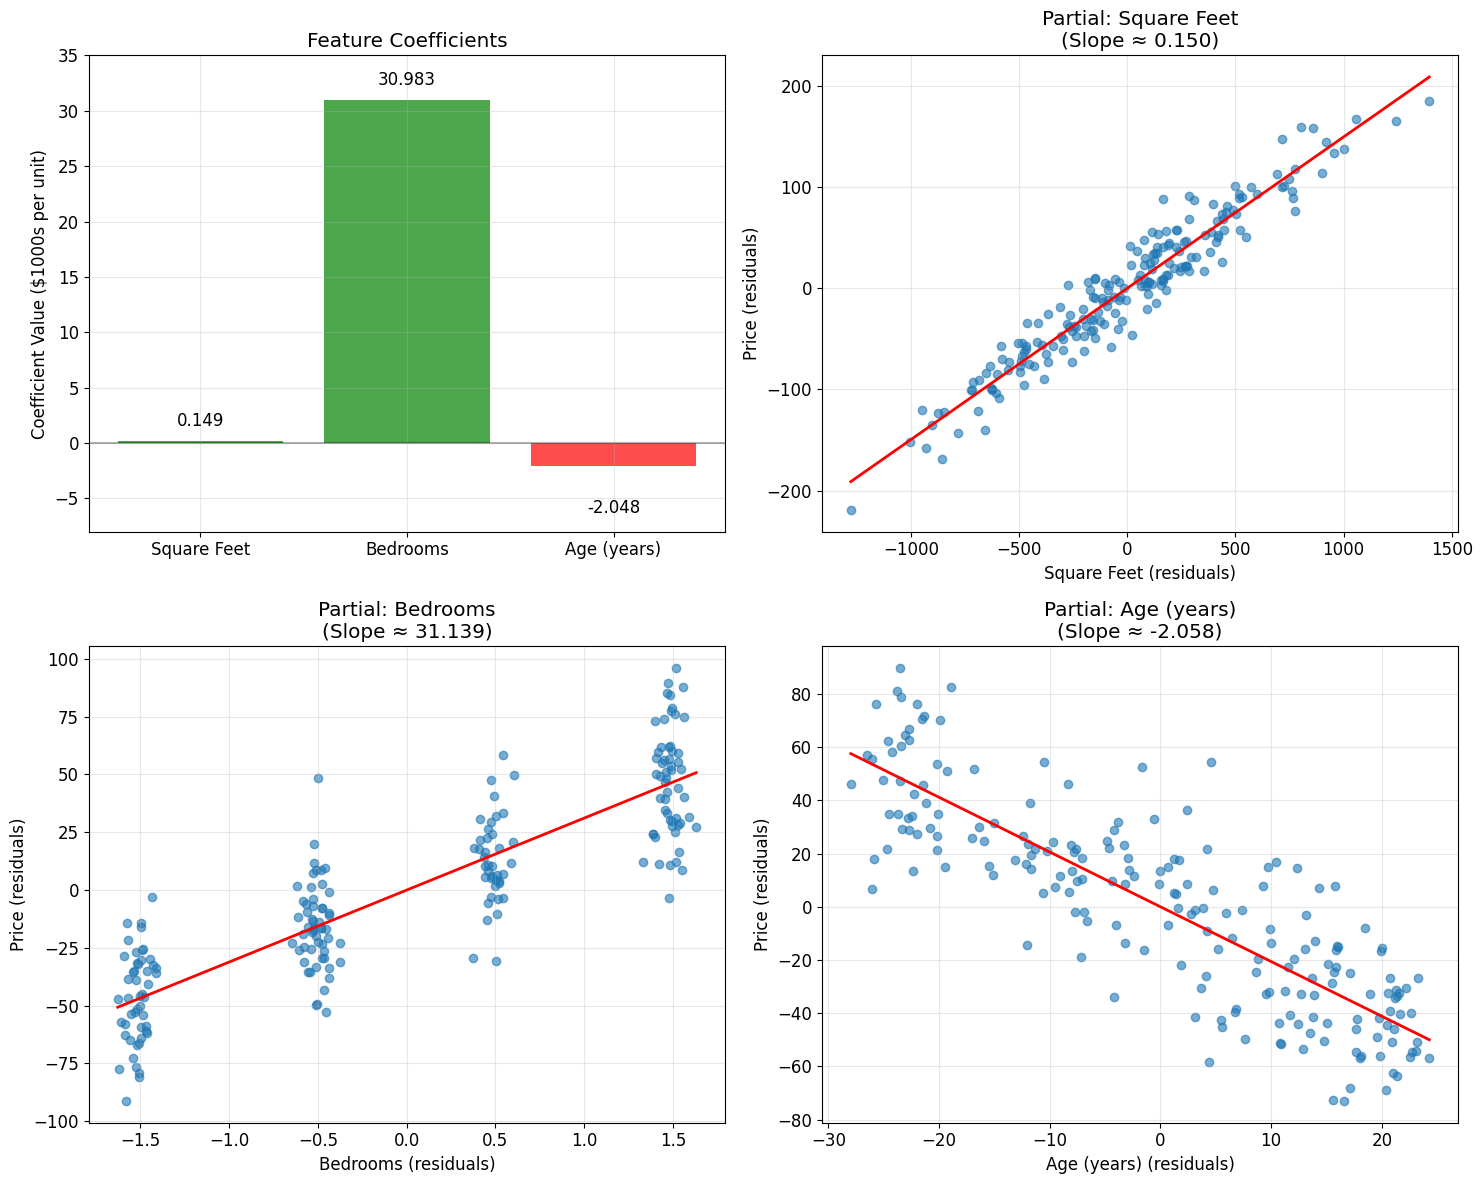

Multiple Regression Results:
R² Score: 0.942
Intercept: $98.7k

Coefficient Interpretation:
• Square Feet: $0.149k per unit (holding others constant)
• Bedrooms: $30.983k per unit (holding others constant)
• Age (years): $-2.048k per unit (holding others constant)

Example: 2200 sqft, 3 bedroom, 10-year-old house
Predicted price: $498.7k


In [37]:
# Create a realistic multiple regression example: house prices
np.random.seed(42)
n_houses = 200

# Features: square footage, number of bedrooms, age of house
sqft = np.random.normal(2000, 500, n_houses)
bedrooms = np.random.choice([2, 3, 4, 5], n_houses)
age = np.random.uniform(0, 50, n_houses)

# True relationship (in thousands of dollars)
# Price increases with sqft and bedrooms, decreases with age
price = (100 +                    # Base price
         0.15 * sqft +           # $150 per sqft
         30 * bedrooms +         # $30k per bedroom
         -2 * age +              # -$2k per year of age
         np.random.normal(0, 20, n_houses))  # Noise

# Fit the model
X_house = np.column_stack([sqft, bedrooms, age])
model_house = LinearRegression().fit(X_house, price)

# Get coefficients and predictions
coefficients = model_house.coef_
intercept = model_house.intercept_
predictions = model_house.predict(X_house)

feature_names = ['Square Feet', 'Bedrooms', 'Age (years)']

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

#
colors = ['green' if coef > 0 else 'red' for coef in coefficients]
bars = ax1.bar(feature_names, coefficients, color=colors, alpha=0.7)
ax1.set_title('Feature Coefficients')
ax1.set_ylabel('Coefficient Value ($1000s per unit)')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add value labels on bars
for bar, coef in zip(bars, coefficients):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (1 if height > 0 else -3),
             f'{coef:.3f}', ha='center', va='bottom' if height > 0 else 'top')

# Set y-limits based on bar heights with some buffer
y_max = 35
y_min = -8
ax1.set_ylim(y_min, y_max)

# Partial regression plots
for i, (feature_name, feature_data) in enumerate(zip(feature_names, [sqft, bedrooms, age])):
    if i < 3:  # We have 3 subplots remaining
        ax = [ax2, ax3, ax4][i]

        # Create residual plot for this feature
        other_features = np.delete(X_house, i, axis=1)

        # Fit model without this feature
        model_reduced = LinearRegression().fit(other_features, price)
        residuals_y = price - model_reduced.predict(other_features)

        # Fit model for this feature against other features
        model_x = LinearRegression().fit(other_features, feature_data)
        residuals_x = feature_data - model_x.predict(other_features)

        # Plot partial regression
        ax.scatter(residuals_x, residuals_y, alpha=0.6)

        # Fit line to residuals
        slope = np.cov(residuals_x, residuals_y)[0,1] / np.var(residuals_x)
        intercept_resid = np.mean(residuals_y) - slope * np.mean(residuals_x)
        x_line = np.linspace(residuals_x.min(), residuals_x.max(), 100)
        y_line = slope * x_line + intercept_resid
        ax.plot(x_line, y_line, 'r-', linewidth=2)

        ax.set_title(f'Partial: {feature_name}\n(Slope ≈ {slope:.3f})')
        ax.set_xlabel(f'{feature_name} (residuals)')
        ax.set_ylabel('Price (residuals)')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model summary
r2 = model_house.score(X_house, price)
print("Multiple Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"Intercept: ${intercept:.1f}k")
print("\nCoefficient Interpretation:")
for name, coef in zip(feature_names, coefficients):
    print(f"• {name}: ${coef:.3f}k per unit (holding others constant)")

# Example prediction
example_house = [2200, 3, 10]  # 2200 sqft, 3 bedrooms, 10 years old
predicted_price = model_house.predict([example_house])[0]
print(f"\nExample: 2200 sqft, 3 bedroom, 10-year-old house")
print(f"Predicted price: ${predicted_price:.1f}k")

**Key Takeaway:** In multiple regression, each coefficient represents the independent effect of that feature on the outcome, controlling for all other features. Partial regression plots help visualize these individual relationships.

## Summary

Key insights from this demo:

1. **Cost Function Landscape**: Linear regression has a convex cost function with a unique global minimum

2. **Outlier Sensitivity**: Single outliers can dramatically change the fitted line due to squared error minimization

3. **Residual Analysis**: Random residual patterns indicate good model fit; patterns suggest model violations

4. **Feature Scaling**: Standardizing features with different scales dramatically improves convergence speed

5. **Bias-Variance Tradeoff**: Higher polynomial degrees improve training fit but can hurt generalization

6. **Coefficient Interpretation**: In multiple regression, coefficients show the independent effect of each feature

These concepts form the foundation for understanding when and how to use linear regression effectively.